# Formulario Módulo2

### NÚMEROS PSEUDOALEATORIOS

$$x_n = (ax_{n−1} + b) \mod m.$$

In [ ]:
# OPCIÓN 1
m=9
a=5
b=1
x0=1 #Semilla

x1=(a*x0+b)%m
x2=(a*x1+b)%m
x3=(a*x2+b)%m
x4=(a*x3+b)%m

#OPCIÓN 2
m=2**31
a=1103515245
b=12345
x0=12
n=1
xn=[]
i = 0
while i<=10**4:
    n=(a*(n-1)+b)%m
    xn.append(n)
    i+=1

$$x_n = \left(a^n x_0+b\frac{a^n-1}{a-1}\right) \mod m.$$

In [ ]:
def congruencia(n, m, a, b, x0):
    xn=[]
    i=0
    while i<n:
        x=(a**n*x0+b*((a**n-1)/(a-1)))%m
        xn.append(x)
        x0=x
        i+=1
    return xn
congruencia(10,16,5,3,7)

### MONTECARLO TIPO 1

In [ ]:
#Definimos las fuciones que vamos a utilizar
def g(x):
    return np.exp(x**2)

def h(x):
    return 1/np.log(x)

def k(x):
    return np.sin(x)/x

#Definimos la función montecarlo

def montecarlo(f,a,b,N):
    u=np.random.uniform(a,b,N)
    y=f(u)
    return np.mean(y)*(b-a)

a=2
b=2.1
N=[10, 100, 1000, 10000, 100000]
tablat=pd.DataFrame(columns=["Aproximación_g", "Aproximación_h", "Aproximación_k", "Error_g", "Error_h", "Error_k"], index=N)

for n in N: 
    tablat.loc[n,"Aproximación_g"]= montecarlo(g,a,b,n)
    tablat.loc[n,"Error_g"]= np.abs(6.73789- tablat.loc[n,"Aproximación_g"])
    tablat.loc[n,"Aproximación_h"]= montecarlo(h,a,b,n)
    tablat.loc[n,"Error_h"]= np.abs(0.13938- tablat.loc[n,"Aproximación_h"])
    tablat.loc[n,"Aproximación_k"]= montecarlo(k,a,b,n)
    tablat.loc[n,"Error_k"]= np.abs(0.0472857- tablat.loc[n,"Aproximación_k"])
tablat

### MONTECARLO TIPO 2

,Aproximación,Error
10,0.0,-0.948560
100,0.588,-2.282582
1000,0.552,-3.371693
10000,0.5484,-4.515531
100000,0.543672,-5.669101


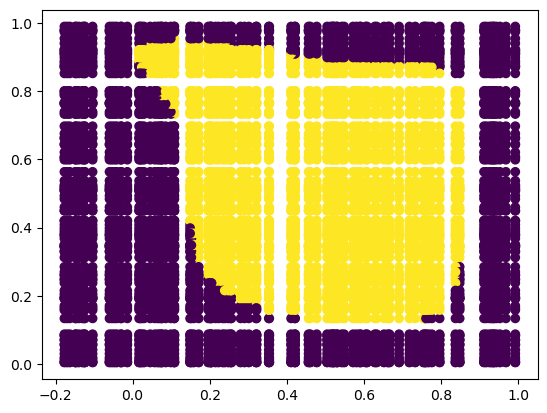

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Definimos la función Montecarlo
def montecarlo2(region, ax, bx, ay, by, N):
    X=np.random.uniform(ax, bx, N)
    Y=np.random.uniform(ay, by, N)
    return np.mean(region(X,Y)) * ((by-ay)*(bx-ax))

#Definimos la región que indica el problema
def region(x,y):
    return 4*(2*x-1)**4+8*(2*y-1)**8<1+2*(2*y-1)**3*(3*x-2)**2

#Empezamos a checar valores que sean buenos para la región
N=100

ax=-0.2
bx=1

ay=0
by=1

X=np.random.uniform(ax, bx, N)
Y=np.random.uniform(ay, by, N)
X, Y=np.meshgrid(X, Y)
plt.scatter(X, Y, c=region(X, Y))
    
    
#Hacemos una tabla en pandas con los datos obtenidos
import pandas as pd

N=[10, 100, 1000, 10000, 100000]

tabla=pd.DataFrame(columns=["Aproximación"], index=N)
for n in N: 
    #Error relativo
    AD = montecarlo2(region, ax, bx, ay, by, n)
    AR = (bx - ax)*(by - ay)
    Crel = np.sqrt( (1 - AD/AR) / (AD/AR) )
    e_rel = np.log(Crel) - np.log(n)/2
    tabla.loc[n,"Aproximación"]= montecarlo2(region, -0.2, 1, 0, 1, n)
    tabla.loc[n,"Error"]= e_rel
    
tabla

### FRACTALES


$$\left[\begin{array}{c}x_{k+1}\\ y_{k+1}\end{array}\right]=\left[\begin{array}{cc}a_i & b_i \\ c_i & d_i\end{array}\right]\left[\begin{array}{c}x_k\\ y_k\end{array}\right]+\left[\begin{array}{c}e_i\\f_i\end{array}\right],$$

donde $a_i$, $b_i$, $c_i$, $d_i$, $e_i$ y $f_i$ son coeficientes que dependen de la variable aleatoria $i\in\left\lbrace 0,1,2,3\right\rbrace$. Las condiciones iniciales son $x_0=y_0=0$.

In [ ]:
# Matriz de Barnsley
import pandas as pd
import numpy as np
i = np.arange(4)

df = pd.DataFrame(index=i, columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción Generada'], dtype="float")
df.index.name="$i$"
df['ai'] = [ 0.0,  0.85,  0.2,  -0.15]
df['bi'] = [ 0.0,  0.04, -0.26,  0.28]
df['ci'] = [ 0.0, -0.04,  0.23,  0.26]
df['di'] = [0.16,  0.85,  0.22,  0.24]
df['ei'] = [ 0.0,  0.00,  0.00,  0.00]
df['fi'] = [ 0.0,  1.60,  1.60,  0.44]
df['pi'] = [0.01,  0.85,  0.07,  0.07]
df['Porción Generada'] = ["Tallo", "Follaje cada vez más pequeño", "Ramas izquierda", "Ramas derecha"]
df

decisiones=["tallo", "follaje", "izq", "der"]
probabilidad=[0.01, 0.85, 0.07, 0.07]
np.random.choice(decisiones, p=probabilidad)


#Opción 1
x=[0]
y=[0]

for k in range(10**5):
    decision=np.random.choice(decisiones,p=probabilidad)
    if decision=="tallo":
        a, b, c, d, e, f = 0, 0, 0, 0.16, 0, 0
    elif decision=="follaje":
        a, b, c, d, e, f = 0.85, 0.04, -0.04, 0.85, 0, 1.6
    elif decision=="izq":
        a, b, c, d, e, f = 0.20, -0.26, 0.23, 0.22, 0, 1.6
    else :
        a, b, c, d, e, f = -0.15, 0.28, 0.26, 0.24, 0, 0.44
    
    
    xkp1 = a*x[-1] + b*y[-1] + e
    ykp1 = c*x[-1] + d*y[-1] + f
    
    x.append(xkp1)
    y.append(ykp1)
    
plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

In [ ]:
#Opción 2
x=np.array([0,0])
x_historial=[]

for k in range(10**6):
    decision=np.random.choice(decisiones,p=probabilidad)
    if decision=="tallo":
        A=np.array([[0, 0],# a, b
                    [0, 0.16]]) # c, d
        b=np.array([0, 0]) #e, f
    elif decision=="follaje":
        A=np.array([[0.85, 0.04],
                    [-0.04, 0.85]])
        b=np.array([0, 1.6])
    elif decision=="izq":
        A=np.array([[0.20, -0.26],
                    [0.23, 0.22]])
        b=np.array([0, 1.6])
    else :
        A=np.array([[-0.15, 0.28],
                    [0.26, 0.24]])
        b=np.array([0, 0.44])
    
     
    x=A @ x + b
    
    x_historial.append(x)
    
X=np.array(x_historial)
x=X[:,0]
y=X[:,1]

plt.figure(figsize=(7, 10))
plt.scatter(x, y, s=1, c="g")

### PROBABILIDAD PRECIO UMBRAL

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getClose(names, start, end):
    return yf.download(names, start=start, end=end)[["Adj Close"]]

def simR(media, std, start, dias, N): #media, estandar, cantidad de días, cantidad de simulaciones
    sim_R = np.random.normal(media, std, size=(dias, N)) +1
    fechas = pd.date_range(start, periods=dias)
    return pd.DataFrame(sim_R, index=fechas)

R = aapl.pct_change() #cambio porcentual se saca ((N-A)/A)
aapl=getClose("AAPL", "2016-01-01", "2016-12-31")

aapl.iloc[-1]
sim_R= simR(R.mean(), R.std(), "2017-01-01", 10, 100) #Simulación de 10 días 100 veces
precios_simulados = sim_R.cumprod()*26.912582 #PRODUCTO ACUMULADO
precios_simulados.mean(axis=1)#toma el promedio del eje x (axis=1)
sim_R= simR(R.mean(), R.std(), "2017-01-01", 1000, 100000)
precios_cierre=sim_R.cumprod()*26.912582  #PRECIOS DE CIERRE
precios_cierre.mean(axis=1)
sim_R= simR(R.mean(), R.std(), "2017-01-01", 365, 10000)
(sim_R.cumprod()*26.912582 > 28).mean(axis=1) #Cuantas simulaciones fueron mayores a 28- PROBABILIDAD DE PRECIO UMBRAL


msft = getClose("MSFT", "2016-01-01", "2016-12-31")
R_msft = msft.pct_change()
msft_mean = R_msft.mean()
msft_std = R_msft.std()
sim_R_msft = simR(msft_mean, msft_std, "2017-01-01", 365, 10000)
(sim_R_msft.cumprod()*56.632259 > 56.632259*1.05).mean(axis=1)